## TESTEO DE MODELOS 5

En este archivo, siguiendo un proceso similar a los anteriores.

In [58]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

import pylab as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [59]:
salaries = pd.read_csv('../data/salaries_data.csv')
testeo = pd.read_csv('../data/testeo.csv')
muestra = pd.read_csv('../data/muestra.csv')

In [60]:
df = pd.concat([salaries, testeo])

In [61]:
df.reset_index(drop=True, inplace=True)

In [62]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,SE,FT,Data Engineer,140250.00,USD,140250.00,US,100,US,M
1,2022,SE,FT,Data Engineer,135000.00,USD,135000.00,US,100,US,M
2,2021,MI,FT,BI Data Analyst,100000.00,USD,100000.00,US,100,US,M
3,2021,MI,CT,ML Engineer,270000.00,USD,270000.00,US,100,US,L
4,2021,MI,FT,Data Engineer,22000.00,EUR,26005.00,RO,0,US,L
5,2022,MI,FT,Machine Learning Scientist,153000.00,USD,153000.00,US,50,US,M
6,2020,EN,FT,Data Scientist,45000.00,EUR,51321.00,FR,0,FR,S
7,2021,EN,FT,Data Scientist,42000.00,EUR,49646.00,FR,50,FR,M
8,2022,MI,FT,Data Engineer,70000.00,EUR,76940.00,GR,100,GR,M
9,2021,EN,FT,Data Analyst,50000.00,EUR,59102.00,FR,50,FR,M


In [63]:
dictio_typ = {'PT':0, 'FL':1, 'FT':2, 'CT':3}
df.employment_type = df.employment_type.apply(lambda x: dictio_typ[x])

In [9]:
dictio = {'EN': 0, 'MI': 1, 'SE': 2, 'EX':3}
df.experience_level = df.experience_level.apply(lambda x: dictio[x])

In [10]:
def job_title(data):
    if 'Head' in data:
        return 'Data_Head'
    elif 'Director' in data:
        return 'Data_Director'
    elif 'Lead' in data:
        return 'Data_Lead'
    elif 'Principal' in data:
        return 'Data_Princial'
    else:
        return 'Data_Other'

In [11]:
df.job_title = df.job_title.apply(job_title)

In [12]:
df.job_title.unique()

array(['Data_Other', 'Data_Princial', 'Data_Lead', 'Data_Director',
       'Data_Head'], dtype=object)

In [13]:
dictio_title = {'Data_Other': 0, 'Data_Head': 1, 'Data_Lead': 1, 'Data_Director': 2, 'Data_Princial': 3}
df.job_title = df.job_title.apply(lambda x: dictio_title[x])

In [14]:
df.drop('employee_residence', axis = 1, inplace = True)

In [15]:
df.company_location.unique()

array(['US', 'FR', 'GR', 'LU', 'SI', 'DE', 'IN', 'GB', 'PK', 'MD', 'JP',
       'CA', 'AS', 'IE', 'AE', 'MX', 'VN', 'BE', 'KE', 'ES', 'CH', 'CL',
       'CN', 'DK', 'TR', 'NZ', 'PL', 'UA', 'AU', 'NG', 'EE', 'CZ', 'AT',
       'BR', 'DZ', 'IR', 'NL', 'HU', 'PT', 'HN', 'MT', 'RO', 'SG', 'IT',
       'HR', 'IQ', 'IL', 'RU', 'CO', 'MY'], dtype=object)

In [16]:
dictio_comp_loc = {'US':'AME', 'GB':'EUR', 'CA':'AME', 'DE':'EUR', 'IN':'ASI', 'FR':'EUR', 'ES':'EUR', 'GR':'EUR', 'JP':'ASI', 'NL':'EUR', 'PT':'EUR', 
                   'LU':'EUR', 'AE':'ASI', 'AT':'EUR', 'PL':'EUR', 'PK':'ASI', 'TR':'ASI', 'CH':'EUR', 'AU':'AUS', 'BR':'LTM', 'NG':'AFR', 'SI':'EUR', 
                   'BE':'EUR', 'MT':'EUR', 'IR':'EUR', 'DZ':'AFR', 'HU':'EUR', 'CZ':'EUR', 'HN':'LTM', 'RO':'EUR', 'CL':'LTM', 'EE':'EUR', 'UA':'EUR', 
                   'NZ':'AUS', 'DK':'EUR', 'CN':'ASI', 'KE':'AFR', 'VN':'ASI', 'MX':'LTM', 'IE':'EUR', 'AS':'AME', 'MD':'EUR', 'SG':'ASI', 'IT':'EUR', 
                   'HR':'EUR', 'IQ':'ASI', 'IL':'EUR', 'RU':'EUR', 'CO':'LTM', 'MY':'ASI'}

df.company_location = df.company_location.apply(lambda x: dictio_comp_loc[x])

In [17]:
dictio_cont_lab = {'LTM':0, 'AFR':1, 'ASI':2, 'EUR':3, 'AUS':4, 'AME':5}

df.company_location = df.company_location.apply(lambda x: dictio_cont_lab[x])

In [18]:
#dictio_size = {'S':0, 'M':1, 'L':2}

#df.company_size = df.company_size.apply(lambda x: dictio_size[x])

In [19]:
df = pd.get_dummies(df, columns = ['company_size'], drop_first = True)

In [20]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,remote_ratio,company_location,company_size_M,company_size_S
0,2022,2,2,0,140250.0,USD,140250.0,100,5,1,0
1,2022,2,2,0,135000.0,USD,135000.0,100,5,1,0
2,2021,1,2,0,100000.0,USD,100000.0,100,5,1,0
3,2021,1,3,0,270000.0,USD,270000.0,100,5,0,0
4,2021,1,2,0,22000.0,EUR,26005.0,0,5,0,0


In [21]:
from sklearn.preprocessing import StandardScaler    

data_num=pd.DataFrame(StandardScaler().fit_transform(df[['work_year', 'remote_ratio']]),
                      
                      columns= ['work_year', 'remote_ratio'])


data_obj=df[['job_title', 'company_size_M', 'company_size_S', 'experience_level', 'employment_type', 'company_location']]

data=pd.concat([data_num, data_obj], axis=1)

In [22]:
salarios = salaries.salary_in_usd

In [23]:
train = data.iloc[:500, :]
test = data.iloc[500:, :]

In [24]:
train.head()

,work_year,remote_ratio,job_title,company_size_M,company_size_S,experience_level,employment_type,company_location
0,0.859977,0.714862,0,1,0,2,2,5
1,0.859977,0.714862,0,1,0,2,2,5
2,-0.586023,0.714862,0,1,0,1,2,5
3,-0.586023,0.714862,0,0,0,1,3,5
4,-0.586023,-1.743615,0,0,0,1,2,5


In [25]:
train['salarios'] = salarios

In [24]:
train.head()

,work_year,remote_ratio,job_title,company_size_M,company_size_S,experience_level,employment_type,company_location,salarios
0,0.859977,0.714862,0,1,0,2,2,5,140250
1,0.859977,0.714862,0,1,0,2,2,5,135000
2,-0.586023,0.714862,0,1,0,1,2,5,100000
3,-0.586023,0.714862,0,0,0,1,3,5,270000
4,-0.586023,-1.743615,0,0,0,1,2,5,26005


In [25]:
test.head()

,work_year,remote_ratio,job_title,company_size_M,company_size_S,experience_level,employment_type,company_location
500,-2.032024,-1.743615,0,0,1,2,2,2
501,-2.032024,0.714862,1,0,0,1,2,5
502,-2.032024,0.714862,0,0,0,1,2,5
503,-2.032024,-1.743615,0,1,0,1,2,2
504,-2.032024,0.714862,0,0,0,1,2,2


In [26]:
X = train.drop('salarios', axis = 1)

y = train.salarios

In [27]:
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(X, y, train_size = 0.8)

In [28]:
from lazypredict.Supervised import LazyRegressor 

lazy=LazyRegressor()
lazy.fit(X_train, X_test, y_train, y_test)

100%|███████████████████████████████████████████| 42/42 [00:03<00:00, 11.13it/s]


(                               Adjusted R-Squared  R-Squared      RMSE  \
 Model                                                                    
 PoissonRegressor                             0.32       0.38  52805.53   
 GammaRegressor                               0.31       0.36  53477.04   
 ElasticNet                                   0.29       0.35  54119.52   
 HuberRegressor                               0.28       0.34  54358.77   
 PassiveAggressiveRegressor                   0.28       0.34  54378.27   
 TweedieRegressor                             0.27       0.33  54728.10   
 RANSACRegressor                              0.27       0.33  54816.05   
 LassoLarsIC                                  0.26       0.32  55171.38   
 LarsCV                                       0.26       0.32  55404.73   
 LassoLarsCV                                  0.26       0.32  55404.73   
 LassoCV                                      0.25       0.31  55472.11   
 BayesianRidge           

In [29]:
from sklearn.linear_model import PoissonRegressor


poisson = PoissonRegressor()

poisson.fit(X, y)

PoissonRegressor()

In [30]:
pred_5 = poisson.predict(test)

In [31]:
from sklearn.metrics import mean_squared_error as mse  

#mse(y, pred_5, squared=False)

In [33]:

muestra['salary_in_usd'] = pred_5

muestra.to_csv('muestra(Poisson_3).csv', index = False)

In [34]:
from sklearn.linear_model import HuberRegressor

huber = HuberRegressor()
huber.fit(X, y)

pred_6 = huber.predict(test)

muestra['salary_in_usd'] = pred_6

In [35]:
muestra.to_csv('muestra(huber).csv', index = False)

In [36]:
muestra.head()

,id,salary_in_usd
0,0,54046.37
1,1,141887.03
2,2,119047.78
3,3,34471.86
4,4,48469.81


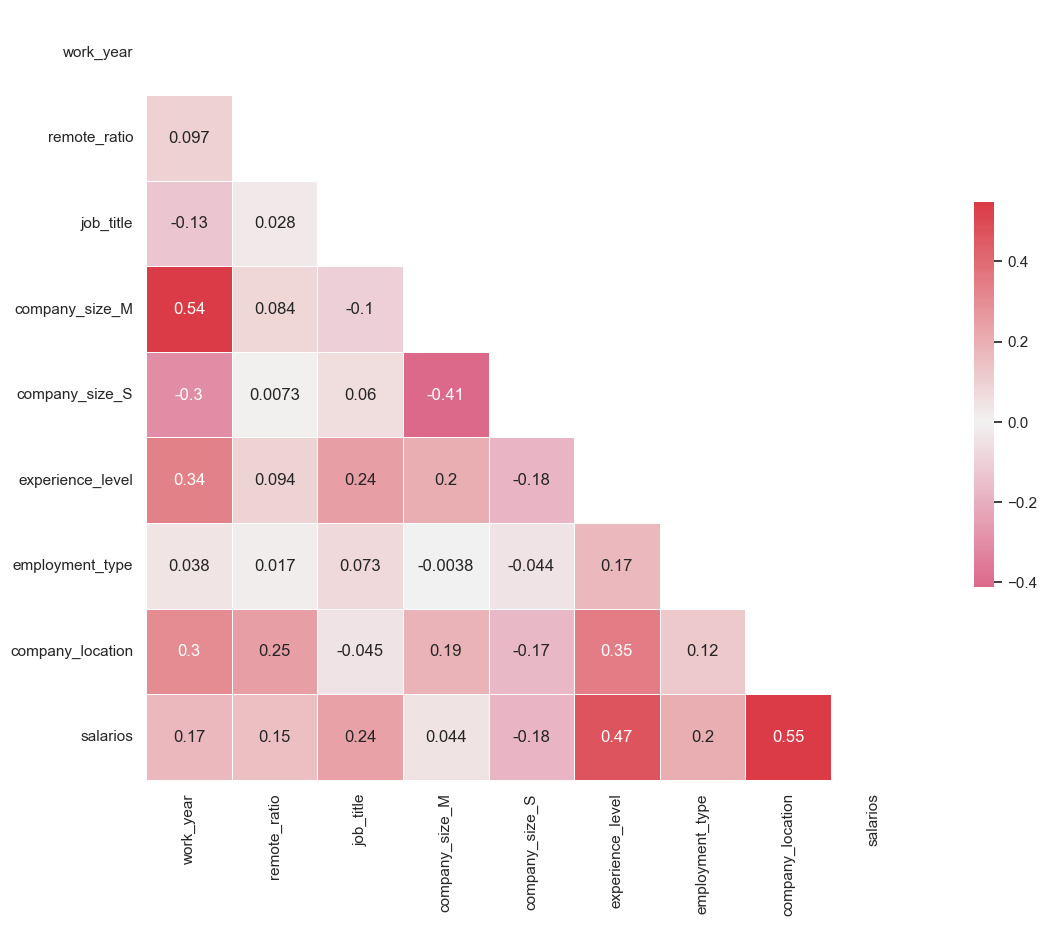

In [30]:
plt.figure(figsize=(15, 10))

sns.set(style='white')

mask=np.triu(np.ones_like(train.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(train.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

In [31]:
X.head()

,work_year,remote_ratio,job_title,company_size_M,company_size_S,experience_level,employment_type,company_location
0,0.86,0.71,0,1,0,2,2,5
1,0.86,0.71,0,1,0,2,2,5
2,-0.59,0.71,0,1,0,1,2,5
3,-0.59,0.71,0,0,0,1,3,5
4,-0.59,-1.74,0,0,0,1,2,5


In [32]:
from sklearn.decomposition import PCA  

pca = PCA(n_components=4)

data_pca = pca.fit_transform(X)

df = pd.DataFrame(data_pca)

df.head()

,0,1,2,3
0,-1.48,-0.04,0.43,0.08
1,-1.48,-0.04,0.43,0.08
2,-0.51,0.96,-0.33,-0.49
3,-0.39,1.14,-0.55,-0.34
4,0.43,-0.73,-1.89,-0.49


In [39]:
from sklearn.decomposition import PCA  

pca = PCA(n_components=4)

data_pca = pca.fit_transform(test)

df_test = pd.DataFrame(data_pca)

In [41]:
from sklearn.linear_model import HuberRegressor

huber = HuberRegressor()
huber.fit(df, y)

pred_7 = huber.predict(df_test)

muestra['salary_in_usd'] = pred_7

In [43]:
muestra.to_csv('muestra(huber_pca_4).csv', index = False)

In [42]:
muestra.head()

,id,salary_in_usd
0,0,91967.71
1,1,127896.46
2,2,115504.05
3,3,72541.69
4,4,47018.70


In [37]:
df.shape

(500, 4)

In [38]:
huber = HuberRegressor()
huber.fit(df, y)

HuberRegressor()

In [ ]:
huber.pred

In [48]:
from sklearn.model_selection import GridSearchCV        # por fuerza bruta
from sklearn.model_selection import RandomizedSearchCV

In [49]:
def grid(modelo, param):

    g = GridSearchCV(modelo,   # modelo de sklearn
                     param,    # diccionario de parametros
                     cv=5,     # nº de cortes
                     return_train_score=True, # error en entrenamiento para checkear
                     n_jobs=-1  # usa todos los nucleos disponibles
                     )

    g.fit(X_train, y_train)

    print('Acierto test: {:.2f}'.format(g.score(X_test, y_test)))
    print('Acierto train: {:.2f}'.format(g.score(X_train, y_train)))
    print('Mejores parametros: {}'.format(g.best_params_))
    print('Mejor acierto cv: {:.2f}'.format(g.best_score_))


    return g.best_estimator_.fit(X_train, y_train)




In [50]:
epsilon = [e + 0.05 for e in range(1, 2)]
max_iter = [e for e in range(90, 110)]
warm_start = [False, True]
fit_intercept = [True, False]



In [51]:
parametros = {'epsilon':epsilon,
              'max_iter':max_iter,
              'warm_start':warm_start,
              'fit_intercept':fit_intercept}



In [52]:
grid(HuberRegressor(), parametros)



Acierto test: 0.36
Acierto train: 0.44
Mejores parametros: {'epsilon': 1.05, 'fit_intercept': True, 'max_iter': 90, 'warm_start': False}
Mejor acierto cv: 0.43


HuberRegressor(epsilon=1.05, max_iter=90)

In [53]:
from sklearn.linear_model import HuberRegressor

huber = HuberRegressor(epsilon=1.05, max_iter=90)
huber.fit(X, y)

pred_8 = huber.predict(test)

muestra['salary_in_usd'] = pred_8

In [54]:
muestra.to_csv('muestra(huber_grid_1).csv', index = False)

In [55]:
from sklearn.linear_model import HuberRegressor

huber = HuberRegressor(epsilon=1.54, alpha=0.0001, fit_intercept=True)
huber.fit(X, y)

pred_9 = huber.predict(test)

muestra['salary_in_usd'] = pred_9

In [56]:
muestra.to_csv('muestra(huber_grid_2).csv', index = False)